# <center> **Final Project Data Mining**

## **Kelompok 4**
1. Aditya Firmansyah - 2006464152
2. Fadhillah Daffa Yoriko - 2006571116
3. Galih Nur Kantaatmaja - 20065711411
4. Jasmine Husna Sanditya - 2006571034
5. Keisha Janita - 2006571021
6. Reynee Joyvina - 2006485024

## **Pembagian Tugas**
Coding
1. Aditya Firmansyah - 2006464152
2. Fadhillah Daffa Yoriko - 2006571116
3. Galih Nur Kantaatmaja - 20065711411

Interpretasi dan Presentasi
1. Jasmine Husna Sanditya - 2006571034
2. Keisha Janita - 2006571021
3. Reynee Joyvina - 2006485024

# PENDAHULUAN
Piala Dunia FIFA 2022 merupakan putaran final ke-22 dari Piala Dunia FIFA, turnamen sepak bola internasional empat tahunan yang diikuti oleh tim nasional senior pria anggota FIFA. Untuk pertama kali, Qatar menyelenggarakan turnamen ini dan menjadi Piala Dunia FIFA pertama yang pernah diadakan di Jazirah Arab, dan di negara mayoritas berpenduduk Muslim. Turnamen edisi ini berlangsung di Qatar pada 20 November hingga 18 Desember 2022. Piala Dunia FIFA 2022 ini juga akan menjadi Piala Dunia FIFA kedua yang diadakan sepenuhnya di Asia setelah Piala Dunia FIFA 2002 di Korea Selatan dan Jepang. Selain itu, turnamen ini akan menjadi yang terakhir yang melibatkan 32 tim, pada periode selanjutnya (yaitu pada Piala Dunia FIFA 2026 di Amerika Utara) putaran final akan melibatkan 48 tim.

# INSTAL MODUL

In [ ]:
pip install --upgrade git+https://github.com/kevctae/twint.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-v9r8tckm
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-v9r8tckm


In [ ]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, networkx as nx 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import twint
import nest_asyncio
import pandas as pd
import re

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()

`Proses pencarian data`

Akan dilakukan pencarian data dengan hastag yang cukup banyak yakni #PialaDunia2022

![satu](https://drive.google.com/uc?export=view&id=1zJeqZQgg1gidI8lXZIClpaE9Bu0tqqoR)

Simpan data dalam bentuk csv

![dua](https://drive.google.com/uc?export=view&id=1BoZJbUY0a7yQADLK_iR9yiPJv7svzXOq)

# IMPORT DATA

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/adityafirmansyah01/datminprojekahir/main/data_tweet%20piala%20dunia.csv')
data.tail()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
23770,1604976252607422465,1604976252607422465,1671491132000.0,2022-12-19 23:05:32,0,NaN,"Piala Dunia Berakhir, Saatnya Dukung Timnas In...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
23771,1604976066069757953,1604976066069757953,1671491087000.0,2022-12-19 23:04:47,0,NaN,Skuat timnas Prancis telah kembali dari Piala ...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
23772,1604975770337935360,1604975770337935360,1671491017000.0,2022-12-19 23:03:37,0,NaN,Gak ada yang namanya settingan di Piala Dunia ...,in,['qatar2022'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
23773,1604975516242837504,1604975516242837504,1671490956000.0,2022-12-19 23:02:36,0,NaN,"Euyy,Udah abis berapa selama Piala Dunia kemar...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
23774,1604975128592646144,1604975128592646144,1671490864000.0,2022-12-19 23:01:04,0,NaN,Kenapa Argentina pas juara Piala Dunia keadaan...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Diperoleh data sebanyak 23775 yang merupakan data dari twitter tentang PialaDunia2022

In [ ]:
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

# PREPROCESSING

Missing Value

In [ ]:
print(data.isnull().sum())

id                     0
conversation_id        0
created_at             0
date                   0
timezone               0
place              23760
tweet                  0
language               2
hashtags               2
cashtags               2
user_id                2
user_id_str            2
username               2
name                   4
day                    4
hour                   2
link                   2
urls                   2
photos                 2
video                  4
thumbnail          19384
retweet                4
nlikes                 4
nreplies               4
nretweets              4
quote_url          22703
search                 4
near               23773
geo                23775
source             23775
user_rt_id         23775
user_rt            23775
retweet_id         23775
reply_to               4
retweet_date       23775
translate          23775
trans_src          23775
trans_dest         23775
dtype: int64


Dari missing value di atas, kita akan menggunakan kolom username dan tweet untuk menganalisis Euforia Piala Dunia 2022

Cek duplikat pada Data

In [ ]:
print(data.duplicated().sum())

11758


In [ ]:
#Hapus data duplicated
data.drop_duplicates(inplace=True)

Dari duplicate data diatas, kita berhasil menghapus 11758 data. Sehingga tadi data yang total diambil 23775 sekarang menjadi 12017

Membuat fungsi cleantext

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

Aplikasikan fungsi ke semua data

Lalu simpan datanya dalam bentuk csv

![tiga](https://drive.google.com/uc?export=view&id=18HZALrOkFpqhD_9UhQSU7mZGV6WF4D8m)

In [ ]:
data_clean = pd.read_csv('https://raw.githubusercontent.com/adityafirmansyah01/datminprojekahir/main/cleaned_tweet.csv', header=None)
data_clean.columns=['clean']
data_clean.head()

,clean
0,liga inggris paling cepat gulir usai jeda pial...
1,main tottenham hotspur laga piala dunia qatar ...
2,mustahil beri istirahat banyak main piala duni...
3,antonio conte vokal lantar premier league jadi...
4,kylian mbappe lionel messi kandidat kuat raih ...


In [ ]:
print(data_clean.duplicated().sum())

13490


In [ ]:
data_clean.drop_duplicates(inplace=True)


Data yang Sudah di Clean kemudian akan di translate bahasa ke dalam bahasa inggris dengan fungsi trans(x), dengan tujuan memudahkan proses analisis sentimen

Translate Data

Kemudian simpan datanya dalam bentuk csv

In [ ]:
def trans(x):
    try:
        blob = TextBlob(x)
        return (str(blob.translate(from_lang = 'id', to = 'en')))
    except: 
        return None

![empat](https://drive.google.com/uc?export=view&id=1YHYIb3CkYpbvZmeQZsvcyXSelVgNbedb)

Data yang sudah di translate kemudian didownload dan diupload ke dalam repository untuk memudahkan Sentimen Analisis

# ANALISIS SENTIMEN

In [ ]:
data_trans = pd.read_csv('https://raw.githubusercontent.com/adityafirmansyah01/datminprojekahir/main/translate.csv', header=None)
data_trans.columns=['tweet']

In [ ]:
data_trans.drop_duplicates(inplace=True)

In [ ]:
data_trans.reset_index(inplace=True)
data_trans.drop("index",axis =1,inplace=True)
data_trans.head()

,tweet
0,English League The fastest scrolls after the 2...
1,Main Tottenham Hotspur Qatar World Cup match H...
2,It is impossible to give a lot of rest to play...
3,Antonio Conte Vocal Lantar Premier League so t...
4,Kylian Mbappe Lionel Messi Strong Candidate Wi...


Membersihkan simbol-simbol pada tweet

In [ ]:
def clean_text(text):  
    pat1 = r'@[^ ]+'                   
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      
    pat4 = r'\#\w+'                    
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [ ]:
data_trans['tweet']= data_trans['tweet'].astype(str)

In [ ]:
data_trans["cleaned_tweet"] = data_trans["tweet"].apply(clean_text)
data_trans = data_trans [ ~(data_trans["tweet"] =="")]

In [ ]:
data_trans.tail()

,tweet,cleaned_tweet
10357,Argentina Champion World Cup 2022 Qatar Temogr...,argentina champion world cup qatar temographic
10358,End of World Cup when supporting the Indonesia...,end of world cup when supporting the indonesia...
10359,not the name of the Qatar World Cup 2022 Narra...,not the name of the qatar world cup narration...
10360,"Euyy, how long was the World Cup yesterday haha",euyy how long was the world cup yesterday haha
10361,Argentina when the World Cup champion there is...,argentina when the world cup champion there is...


In [ ]:
%%time
print("Running sentiment process")
for row in data_trans.itertuples():
    tweet = data_trans.at[row[0], 'cleaned_tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    data_trans.at[row[0], 'polarity'] = analysis.sentiment[0]
    data_trans.at[row[0], 'subjectivity'] = analysis.sentiment[1]

    #Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        data_trans.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        data_trans.at[row[0], 'Sentiment'] = "Negative"
    else:
        data_trans.at[row[0], 'Sentiment'] = "Neutral"

Running sentiment process
CPU times: user 3.77 s, sys: 27.3 ms, total: 3.8 s
Wall time: 4.09 s


In [ ]:
data_trans[["cleaned_tweet","polarity","Sentiment","subjectivity"]].head(5)

,cleaned_tweet,polarity,Sentiment,subjectivity
0,english league the fastest scrolls after the ...,-0.200000,Negative,0.400000
1,main tottenham hotspur qatar world cup match h...,0.166667,Positive,0.333333
2,it is impossible to give a lot of rest to play...,-0.036111,Negative,0.482143
3,antonio conte vocal lantar premier league so t...,0.360000,Positive,0.596667
4,kylian mbappe lionel messi strong candidate wi...,0.477778,Positive,0.511111


In [ ]:
data_trans[["cleaned_tweet","polarity","Sentiment","subjectivity"]].tail(5)

,cleaned_tweet,polarity,Sentiment,subjectivity
10357,argentina champion world cup qatar temographic,0.000000,Neutral,0.000000
10358,end of world cup when supporting the indonesia...,0.250000,Positive,0.250000
10359,not the name of the qatar world cup narration...,0.311667,Positive,0.523333
10360,euyy how long was the world cup yesterday haha,0.075000,Positive,0.350000
10361,argentina when the world cup champion there is...,0.000000,Neutral,0.000000


In [ ]:
data_trans['Sentiment'].sum()

'NegativePositiveNegativePositivePositivePositiveNeutralPositiveNeutralNeutralPositiveNeutralPositivePositiveNeutralPositiveNeutralPositiveNegativePositivePositivePositiveNeutralNeutralPositiveNeutralPositiveNeutralPositiveNeutralNeutralNeutralNeutralNeutralNeutralPositivePositiveNeutralPositiveNeutralPositiveNeutralNeutralNeutralPositiveNeutralPositiveNeutralNegativeNegativeNeutralPositiveNeutralNeutralPositiveNegativePositiveNeutralNegativeNeutralPositivePositivePositiveNeutralPositiveNeutralNegativeNegativePositiveNeutralNeutralPositivePositivePositiveNeutralNeutralPositiveNeutralNeutralNeutralPositiveNeutralNeutralNegativePositivePositiveNeutralNeutralPositivePositivePositivePositivePositivePositiveNegativeNeutralNeutralNeutralPositiveNegativeNeutralPositiveNegativePositivePositivePositivePositivePositivePositivePositiveNeutralNeutralNeutralNeutralPositiveNeutralNeutralNeutralNeutralPositiveNegativePositiveNeutralPositiveNeutralNegativeNeutralPositiveNegativePositiveNeutralNeutralP

In [ ]:
print(data_trans['Sentiment'])

0        Negative
1        Positive
2        Negative
3        Positive
4        Positive
           ...   
10357     Neutral
10358    Positive
10359    Positive
10360    Positive
10361     Neutral
Name: Sentiment, Length: 10362, dtype: object


In [ ]:
#Copy Data
data_trans1=data_trans.copy()

In [ ]:
data_trans1['Sentiment'].replace(['Negative','Neutral','Positive'],[-1,0,1],inplace=True)
print(data_trans1['Sentiment'])

0       -1
1        1
2       -1
3        1
4        1
        ..
10357    0
10358    1
10359    1
10360    1
10361    0
Name: Sentiment, Length: 10362, dtype: int64


In [ ]:
#Akan
data_trans1[['Sentiment']].to_csv("sentimentNum.csv", index=False, encoding='utf8', header=False)

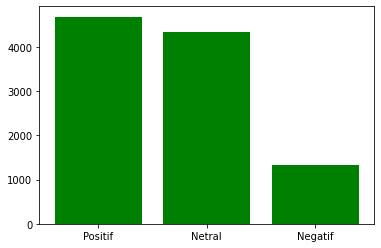

In [ ]:
#Akan dibuat Bar Plot untuk Sentimen Analisis
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Positif", "Netral", "Negatif"])
y = np.array([4683,4347,1332])

plt.bar(x,y,color="green")
plt.show()

Berdasarkan hasil analisis sentimen tweet 
menunjukan bahwa sentimen positif merupakan yang 
terbanyak yaitu sekitar 6015 (45,20%) tweet, diikuti oleh sentimen netral dengan jumlah 4347 (41,95%) tweet dan
sentimen negatif sebanyak 1332 (12,85%) tweet dari yang ditangkap dari setiap kata dalam “cuitan” menjadi 
algoritma. Sentimen publik/netizen dalam sosial 
media dibedakan atas sentimen positif, negatif dan juga 
netral.

In [ ]:
data_trans1[['Sentiment']].to_csv("SentimentNumerik.csv", index=False, encoding='utf8', header=False)

In [ ]:
data_trans1.head()

,tweet,cleaned_tweet,polarity,subjectivity,Sentiment
0,English League The fastest scrolls after the 2...,english league the fastest scrolls after the ...,-0.200000,0.400000,-1
1,Main Tottenham Hotspur Qatar World Cup match H...,main tottenham hotspur qatar world cup match h...,0.166667,0.333333,1
2,It is impossible to give a lot of rest to play...,it is impossible to give a lot of rest to play...,-0.036111,0.482143,-1
3,Antonio Conte Vocal Lantar Premier League so t...,antonio conte vocal lantar premier league so t...,0.360000,0.596667,1
4,Kylian Mbappe Lionel Messi Strong Candidate Wi...,kylian mbappe lionel messi strong candidate wi...,0.477778,0.511111,1


In [ ]:
data_trans.describe()

,polarity,subjectivity
count,10362.000000,10362.000000
mean,0.107526,0.365150
std,0.252341,0.328045
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.375000
75%,0.235958,0.600000
max,1.000000,1.000000


# VISUALISASI

Word Tree

![lima](https://drive.google.com/uc?export=view&id=1wbzrRrPG5c5-oO-XbKJkj3HQomKEFXpY)

Dapat dilihat dari visualisasi word tree, kata-kata yang paling sering muncul adalah 'piala', 'dunia', dan '2022', diikuti oleh kata –kata lain seperti 'juara', 'argentina', 'messi', 'final', dan 'qatar'

**Banyaknya *tweet* per jam**

In [ ]:
data['date']= pd.to_datetime(data['date'], errors='coerce')

In [ ]:
data['hour'] = pd.DatetimeIndex(data['date']).hour
data['dates'] = pd.DatetimeIndex(data['date']).date
data['count'] = 1
data_time = data[['hour', 'dates', 'count']]
data_time.head(5)

,hour,dates,count
0,4.0,2022-12-26,1
1,4.0,2022-12-26,1
2,4.0,2022-12-26,1
3,4.0,2022-12-26,1
4,4.0,2022-12-26,1


In [ ]:
data_jam = data.groupby(["hour"]).sum().reset_index()
data_jam.head(5)

,hour,timezone,day,video,nlikes,nreplies,nretweets,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest,count
0,0.0,0,1748.0,98.0,10095.0,795.0,1386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515
1,1.0,0,2161.0,90.0,6465.0,1012.0,663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611
2,2.0,0,2381.0,131.0,20296.0,1627.0,1589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696
3,3.0,0,2500.0,139.0,2943.0,422.0,557.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,746
4,4.0,0,2498.0,138.0,6100.0,961.0,1013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720


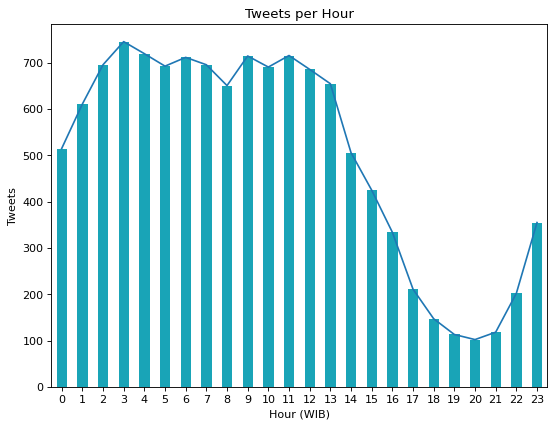

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
data_jam["count"].plot.bar(color='#19a4b7')
data_jam["count"].plot()
plt.xlabel('Hour (WIB)')
plt.ylabel('Tweets')
plt.title('Tweets per Hour')
plt.show()

​Dapat dilihat dari visualisasi jumlah tweet per jam dalam satu hari, tweet yang membahas Piala Dunia 2022 paling sering dicuitkan pada pukul 3 pagi, diikuti pada pukul 9 dan 11 pagi dan mengalami penurunan signifikan dan gradual pada pukul 1 siang dengan cuitan paling sedikit pada pukul 8 malam. Setelah pukul 8 malam, cuitan mengenai Piala Dunia 2022 memiliki kenaikan dalam jumlah lagi.​

**Banyaknya *tweet* per hari**

In [ ]:
data_hari = data.groupby(["dates"]).sum().reset_index()
data_hari.head()

,dates,timezone,day,hour,video,nlikes,nreplies,nretweets,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest,count
0,2022-12-19,0,129.0,2967.0,20.0,603.0,75.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129
1,2022-12-20,0,7858.0,32741.0,811.0,51203.0,3682.0,7461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3929
2,2022-12-21,0,7113.0,21732.0,488.0,48349.0,5075.0,5245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2372
3,2022-12-22,0,6744.0,15744.0,275.0,25488.0,1955.0,3342.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1686
4,2022-12-23,0,7940.0,14875.0,260.0,20767.0,2611.0,3116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1588


In [ ]:
data_hari['dates'] = pd.to_datetime(data_hari['dates'], errors='coerce')

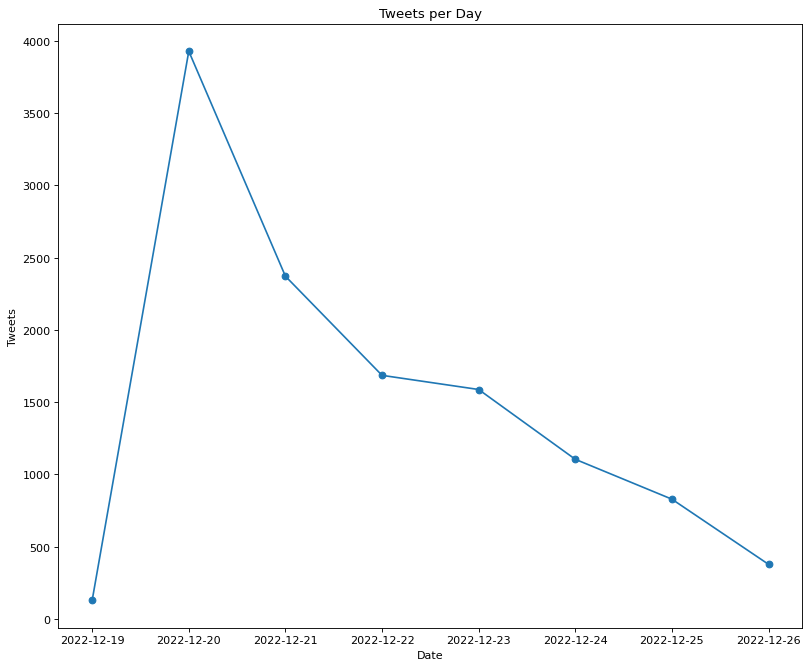

In [ ]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Tweets per Day')
plt.plot_date(data_hari['dates'], data_hari['count'], linestyle='solid')

Dapat dilihat dari plot bahwa dalam rentang tanggal 19-26 Desember 2022, terdapat sekitar 1000 tweet per hari tentang Piala Dunia 2022. Pada tanggal 20 Desember 2022, terdapat >7000 tweet tentang Piala Dunia. Dan popularitas tweet mengenai Piala Dunia kemudian berkurang seiring waktu setelah tanggal 20 Desember 2022.

# Social Network Analytics (SNA)

In [ ]:
del twint, config, nest_asyncio
print(data.shape)
databaru = data.rename({'username': 'user'}, axis=1) 
databaru = data[['username', 'tweet']]
databaru.head()

(12017, 40)


,username,tweet
0,detiksport,Liga Inggris paling cepat bergulir lagi usai j...
1,sport7trans7,Pemain Tottenham Hotspur yang berlaga di Piala...
2,sport7trans7,"🗣️""Mustahil memberikan mereka istirahat yang b..."
3,sport7trans7,"Antonio Conte vokal, lantaran Premier League m..."
4,KuretaID,Kylian Mbappe dan Lionel Messi Kandidat Kuat P...


In [ ]:
users = databaru.username.to_list()
tweets = databaru.tweet.to_list()
G = nx.Graph() 
G.add_nodes_from(users)

In [ ]:
import operator

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]
    databaru = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 
        databaru = databaru[:N]
        out = len(databaru[abs(databaru - np.mean(databaru)) > m * np.std(databaru)])
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(databaru[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) 
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) 
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) 
        nx.draw_networkx_labels(G,pos) 
        plt.show() 
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

In [ ]:
Gt = Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['TigarisAlifandi', 'fikriromdhoni10', 'tribunjateng', 'Hijrahber', 'AhmadGaus', 'izau_mh', 'Pinusidotcom', 'akunkutriplea', 'NewsArrahmah', 'chaipilow']
Influencial Users Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


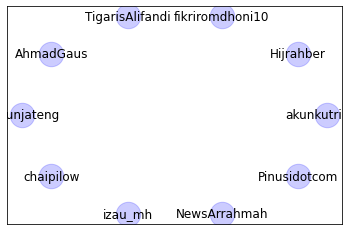

In [ ]:
drawGraph(Gt, True, layOut='circular')

Influencial Users: ['TigarisAlifandi', 'fikriromdhoni10', 'tribunjateng', 'Hijrahber', 'AhmadGaus', 'izau_mh', 'Pinusidotcom', 'akunkutriplea', 'NewsArrahmah', 'chaipilow']
Influencial Users Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


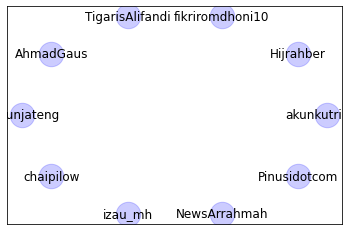

In [ ]:
Gt = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')
drawGraph(Gt, True, layOut='circular')

# Kesimpulan 

Berdasarkan hasil analisis sentimen tweet dengan metode text mining, dapat disimpulkan bahwa;
1.  Sentimen positif lebih dominan yaitu sebanyak 6015 (45,20%) tweet, diikuti oleh sentimen negatif sebanyak 1332 (12,85%) tweet dan sentimen netral dengan jumlah 4347 (41,95%).
2. Jumlah tweet mengenai Piala Dunia 2022 paling banyak dicuitkan pada tanggal 20 Desember 2022 dan secara gradual menurun setelah hari tersebut.
3. Cuitan mengenai Piala Dunia 2022 per hari-nya paling sering dicuitkan pada pukul 3 pagi dan paling sedikit dicuitkan pada pukul 8 malam.
4. Beberapa user yang paling influential pada tweet mengenai Piala Dunia 2022 diantaranya ada TigarisAlifandi, Hijrahber, tribunjateng, dll.
5. Topik Piala Dunia 2022 masih menjadi topik yang hangat untuk dibincangkan pengguna twitter dengan setidaknya 1000 tweet per hari pada rentang waktu 19-26 Desember 2022.


# LINK VIDEO PRESENTASI

https://drive.google.com/drive/folders/1-1OklWmthUxLVh-44SZhctIgJJ50Q49h